## Initialization Phase + Data Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('malaysia_produce.csv')
df_LCU, df_SLC, df_USD, df_PPI = [df[df.Element == 'Producer Price (LCU/tonne)'], 
df[df.Element == 'Producer Price (SLC/tonne)'],
df[df.Element == 'Producer Price (USD/tonne)'], df[df.Element == 'Producer Price Index (2014-2016 = 100)']]

In [3]:
df_LCU.head()

,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
29,MYS,01/01/2004,31/12/2004,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2004,7021,Annual value,9130
30,MYS,01/01/2005,31/12/2005,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2005,7021,Annual value,11080
31,MYS,01/01/2006,31/12/2006,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2006,7021,Annual value,17780
32,MYS,01/01/2007,31/12/2007,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2007,7021,Annual value,12600
33,MYS,01/01/2008,31/12/2008,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2008,7021,Annual value,14650


In [4]:
# Initialize directory of Items with Appropriate date range
valid_year_dictionary = {}

def check_year_order(l):
    return all([l[i] + 1 == l[i + 1] for i in range(len(l) - 1)])

for each in df_LCU.Item.unique():
    valid_year_dictionary[each] = check_year_order(df_LCU[df_LCU.Item == each].Year.unique())
    #print (each, check_year_order(df_LCU[df_LCU.Item == each].Year.unique()))

In [8]:
# Check valid_year_directionary total count
count_true, count_false = 0, 0
valid_items = []
for key, values in valid_year_dictionary.items():
    if values: 
        count_true += 1
        valid_items.append(key)
    else: count_false += 1
        
print (count_true)
print (count_false)

38
22


### Filtered DF_LCU dataframe with accurate entries with ascending years

In [135]:
df_fil_LCU = df_LCU[(df_LCU.Item.isin(valid_items))].reset_index()
df_fil_LCU.to_csv('df_LCU_filtered.csv') #Save as csv

In [130]:
df_PPI[df_PPI.Months == 'Annual value'].groupby(by = 'Item').mean().reset_index().head()

,Item,Item Code,Year,Months Code,Value
0,Agriculture,2051.0,2005.0,7021.0,62.172414
1,Areca nuts,226.0,2005.0,7021.0,72.551724
2,Asparagus,367.0,2008.5,7021.0,77.454545
3,Bananas,486.0,2005.0,7021.0,49.103448
4,Bananas Cavendish,484.0,2015.5,7021.0,106.000000


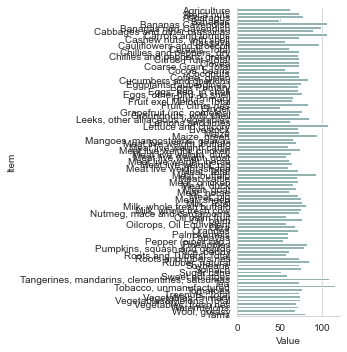

In [129]:
g = sns.catplot(
    data = df_PPI[df_PPI.Months == 'Annual value'].groupby(by = 'Item').mean().reset_index(),
    y = 'Item',
    x = 'Value',
    kind = 'bar',
    color = '#8cb8b7'
)

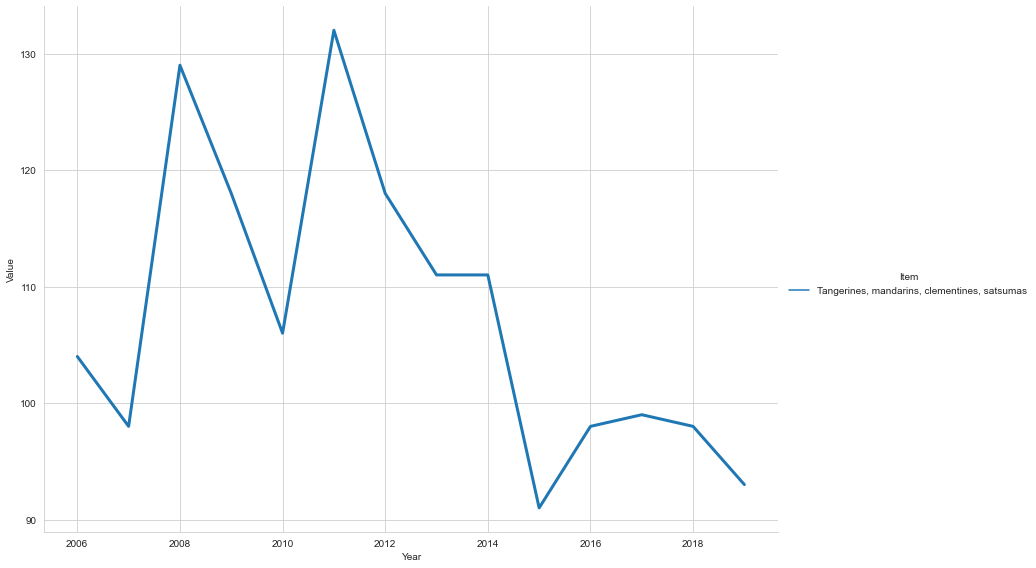

In [122]:
g = sns.relplot(
    #data = df_fil_LCU[(df_fil_LCU.Value > 10000)], 
    data = df_PPI[(df_PPI.Item == 'Tangerines, mandarins, clementines, satsumas')], 
    x = 'Year', 
    y = 'Value', 
    hue = 'Item', 
    lw = 3,
    kind = 'line',
    height = 8,
    aspect = 1.4
)

In [138]:
df_fil_LCU

,index,Iso3,StartDate,EndDate,Area,Item Code,Item,Element,Year,Months Code,Months,Value
0,29,MYS,01/01/2004,31/12/2004,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2004,7021,Annual value,9130
1,30,MYS,01/01/2005,31/12/2005,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2005,7021,Annual value,11080
2,31,MYS,01/01/2006,31/12/2006,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2006,7021,Annual value,17780
3,32,MYS,01/01/2007,31/12/2007,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2007,7021,Annual value,12600
4,33,MYS,01/01/2008,31/12/2008,Malaysia,367,Asparagus,Producer Price (LCU/tonne),2008,7021,Annual value,14650
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,9430,MYS,01/08/2020,31/08/2020,Malaysia,137,Yams,Producer Price (LCU/tonne),2020,7008,August,3400
3831,9431,MYS,01/09/2020,30/09/2020,Malaysia,137,Yams,Producer Price (LCU/tonne),2020,7009,September,3050
3832,9432,MYS,01/10/2020,31/10/2020,Malaysia,137,Yams,Producer Price (LCU/tonne),2020,7010,October,2800
3833,9433,MYS,01/11/2020,30/11/2020,Malaysia,137,Yams,Producer Price (LCU/tonne),2020,7011,November,3000


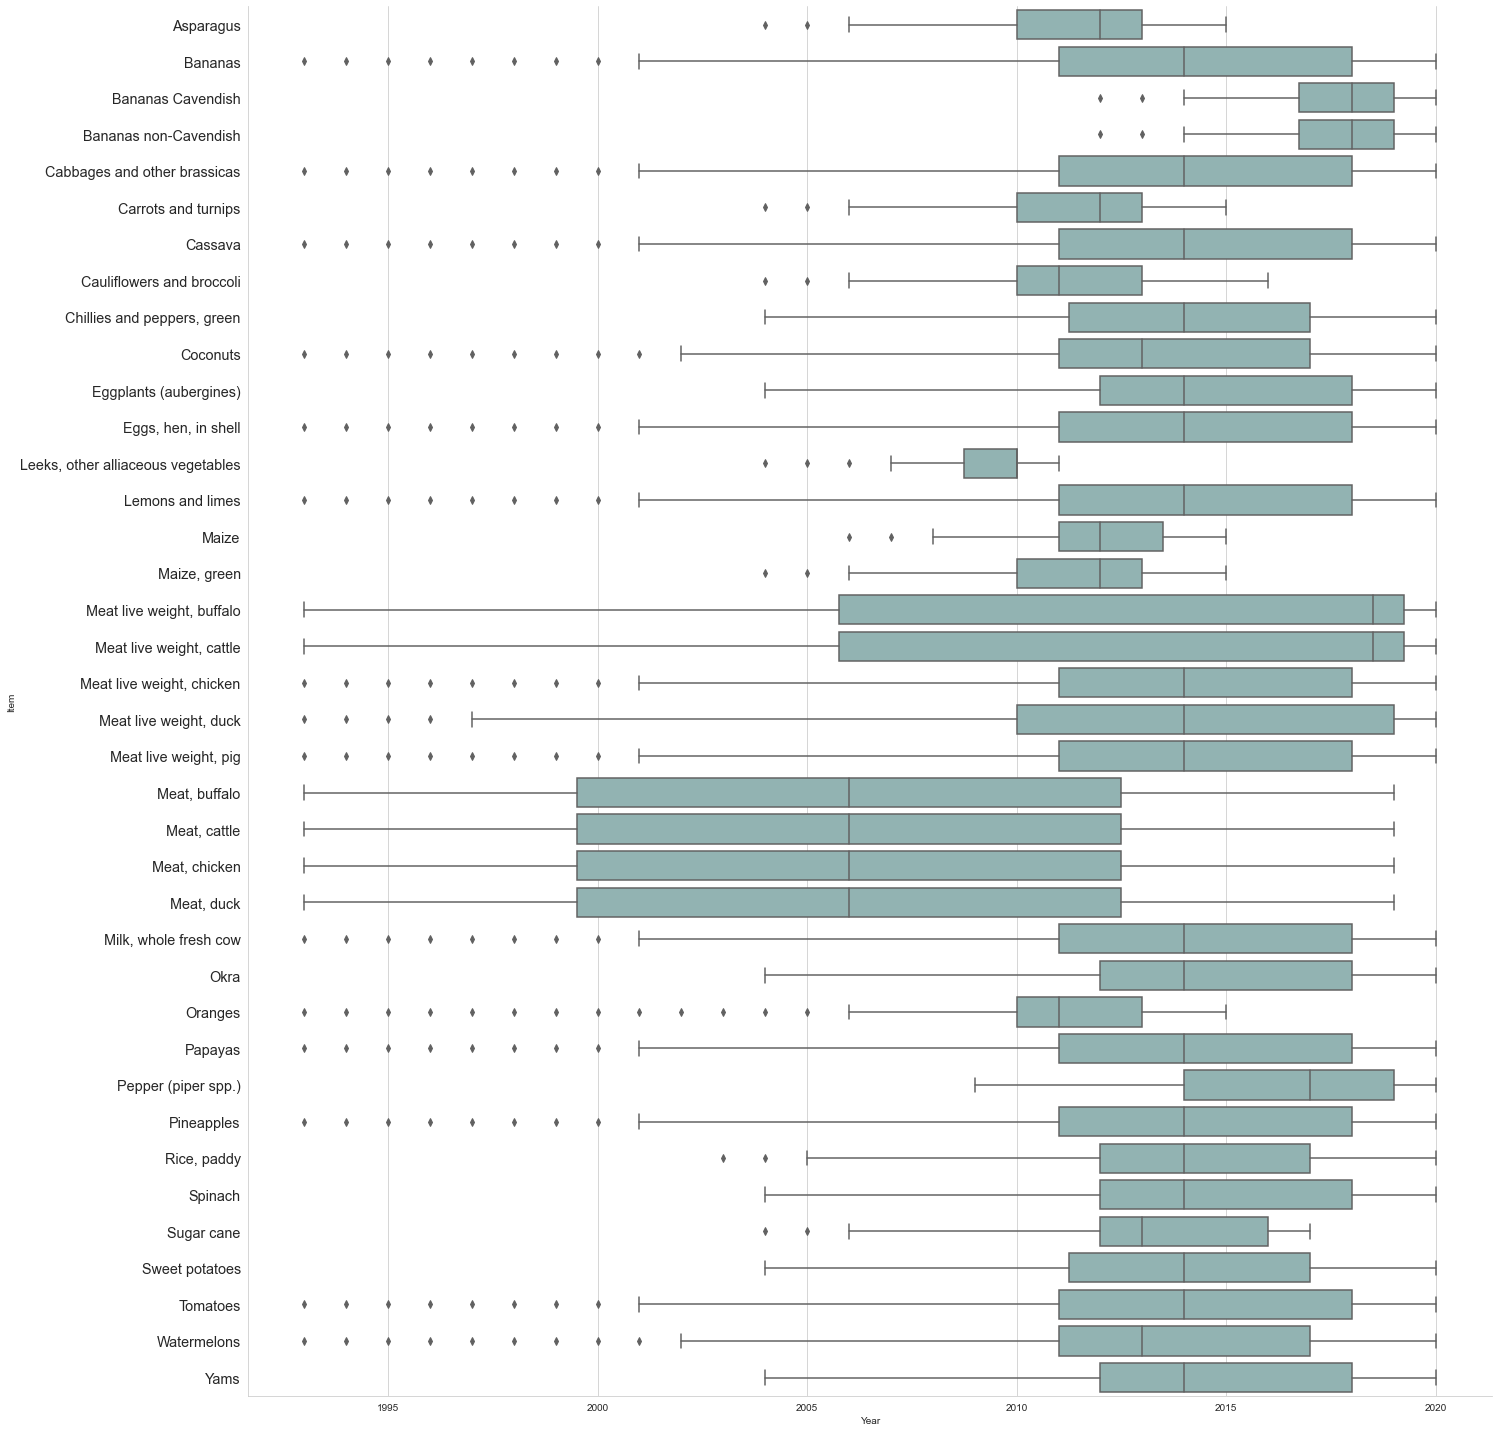

In [137]:
g = sns.catplot(
    data = df_fil_LCU,
    y = 'Item',
    x = 'Year',
    #aspect = 2.5,
    height = 20,
    kind='box',
    color = '#8cb8b7'
)

g.ax.set_yticklabels(df_fil_LCU.Item.unique(), fontsize = 'x-large')
plt.show()